# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix

## 1. Download the dataset [1 point]

In [2]:
import pandas as pd
import requests

# URL of the dataset
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"

# Send an HTTP request to get the content of the URL
response = requests.get(url)

# Save the content of the response to a file
with open("financial_news_headlines_sentiment.csv", "wb") as file:
    file.write(response.content)

print("Dataset downloaded successfully.")


Dataset downloaded successfully.


## 2. Load the dataset [1 point]

In [3]:

df = pd.read_csv(url, encoding='latin1', header=None, names=['sentiment', 'headline'])

df.head()

,sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


## 3. Explore the dataset [10 points]

In [4]:
print("Exploratory Data Analysis:")

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display descriptive statistics for numeric columns
print("\nDescriptive statistics for numeric columns:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

print(df.head())

print(df.info())

print(df['sentiment'].value_counts())

Exploratory Data Analysis:

Shape of the dataset:
(4846, 2)

Data types of each column:
sentiment    object
headline     object
dtype: object

Descriptive statistics for numeric columns:
       sentiment                                           headline
count       4846                                               4846
unique         3                                               4838
top      neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq        2879                                                  2

Missing values:
sentiment    0
headline     0
dtype: int64
  sentiment                                           headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
<class 'pandas.core.frame.DataFrame

## 4. Clean the data [5 points]

In [5]:
import re
import string

def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers
    return text

#remove duplicate rows
df = df.drop_duplicates()


df['headline_clean'] = df['headline'].apply(lambda x: clean_text(x))

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [8]:
from imblearn.over_sampling import SMOTE


# Before splitting the data, apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_bow, df['sentiment'])

## 6. BoW model [15 points]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['headline_clean'])

## 7. Tf-idf model [15 points]

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['headline_clean'])

## 8. Split train test data [3 points]

In [11]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, df['sentiment'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)
y_pred_nb_bow = nb_classifier.predict(X_test_bow)

print("Naive Bayes Classifier with BoW:")
print(classification_report(y_test, y_pred_nb_bow))

Naive Bayes Classifier with BoW:
              precision    recall  f1-score   support

    negative       0.74      0.53      0.62       118
     neutral       0.79      0.87      0.82       563
    positive       0.67      0.61      0.64       287

    accuracy                           0.75       968
   macro avg       0.73      0.67      0.69       968
weighted avg       0.75      0.75      0.74       968



## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [13]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_classifier.predict(X_test_tfidf)

print("Logistic Regression Classifier with Tf-idf:")
print(classification_report(y_test, y_pred_lr_tfidf))

Logistic Regression Classifier with Tf-idf:
              precision    recall  f1-score   support

    negative       0.82      0.52      0.64       118
     neutral       0.74      0.97      0.84       563
    positive       0.87      0.47      0.61       287

    accuracy                           0.77       968
   macro avg       0.81      0.65      0.70       968
weighted avg       0.79      0.77      0.75       968



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

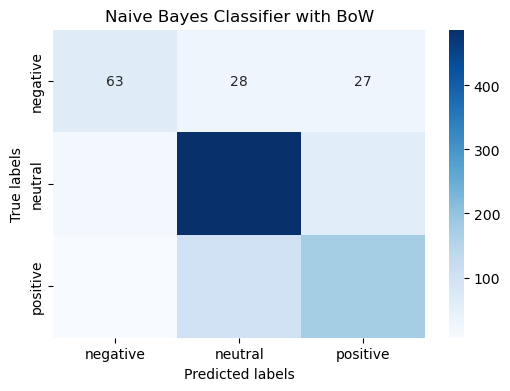

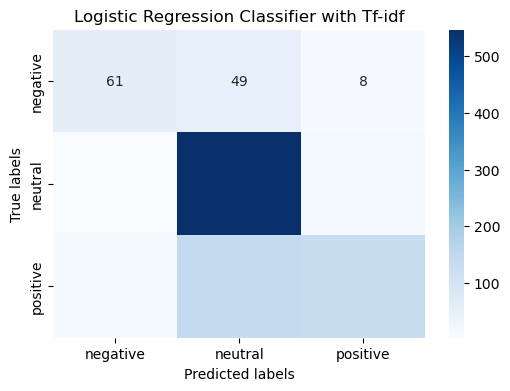

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb_bow, "Naive Bayes Classifier with BoW")
plot_confusion_matrix(y_test, y_pred_lr_tfidf, "Logistic Regression Classifier with Tf-idf")